In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.svm import SVC,LinearSVC
from sklearn.preprocessing import StandardScaler,RobustScaler

# **Data Collection**

In [4]:
stocks= pd.read_csv('/content/nifty_500.csv')

In [5]:
stocks.shape

(501, 17)

In [6]:
stocks.head()

,Company Name,Symbol,Industry,Series,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,Value (Indian Rupee),52 Week High,52 Week Low,365 Day Percentage Change,30 Day Percentage Change
0,3M India Ltd.,3MINDIA,Diversified,EQ,21950.00,21999.00,21126.05,21854.05,21575.00,-279.05,-1.28,4159,8.965357e+07,27800.00,17273.00,-10.18,8.22
1,Aarti Drugs Ltd.,AARTIDRUGS,Healthcare,EQ,400.50,401.80,394.10,403.85,400.00,-3.85,-0.95,31782,1.262731e+07,749.75,378.00,-42.92,-5.10
2,Aavas Financiers Ltd.,AAVAS,Financial Services,EQ,1997.10,2004.05,1894.50,2015.45,1943.15,-72.30,-3.59,150704,2.907728e+08,3340.00,1815.00,-25.69,-9.39
3,ABB India Ltd.,ABB,Capital Goods,EQ,2260.35,2311.50,2260.35,2300.90,2280.00,-20.90,-0.91,97053,2.210935e+08,2487.85,1618.05,27.25,-5.21
4,Abbott India Ltd.,ABBOTINDIA,Healthcare,EQ,18700.40,19200.00,18605.00,18760.40,19199.80,439.40,2.34,12396,2.346770e+08,23934.45,15514.00,11.61,5.84


In [7]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Name               501 non-null    object 
 1   Symbol                     501 non-null    object 
 2   Industry                   501 non-null    object 
 3   Series                     501 non-null    object 
 4   Open                       501 non-null    float64
 5   High                       501 non-null    float64
 6   Low                        501 non-null    float64
 7   Previous Close             501 non-null    float64
 8   Last Traded Price          501 non-null    float64
 9   Change                     501 non-null    object 
 10  Percentage Change          501 non-null    object 
 11  Share Volume               501 non-null    int64  
 12  Value (Indian Rupee)       501 non-null    float64
 13  52 Week High               501 non-null    float64

# **Encoding**

In [8]:
stocks.isnull().sum()

,0
Company Name,0
Symbol,0
Industry,0
Series,0
Open,0
High,0
Low,0
Previous Close,0
Last Traded Price,0
Change,0


In [9]:
stocks['Industry'].value_counts()

,count
Industry,
Financial Services,88
Healthcare,52
Capital Goods,48
Chemicals,38
Fast Moving Consumer Goods,33
Information Technology,29
Consumer Durables,28
Automobile and Auto Components,27
Consumer Services,24


In [10]:
stocks['Industry'].nunique()

21

In [11]:
stocks['Industry'].unique()

array(['Diversified', 'Healthcare', 'Financial Services', 'Capital Goods',
       'Consumer Services', 'Construction Materials', 'Metals & Mining',
       'Power', 'Services', 'Fast Moving Consumer Goods',
       'Oil Gas & Consumable Fuels', 'Information Technology',
       'Chemicals', 'Textiles', 'Automobile and Auto Components',
       'Consumer Durables', 'Telecommunication', 'Realty',
       'Forest Materials', 'Construction',
       'Media Entertainment & Publication'], dtype=object)

In [12]:
stocks['Series'].value_counts()

,count
Series,
EQ,500
BE,1


In [13]:
stocks.replace({'Series':{'EQ':1,'BE':0}},inplace=True)

In [14]:
stocks.head()

,Company Name,Symbol,Industry,Series,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,Value (Indian Rupee),52 Week High,52 Week Low,365 Day Percentage Change,30 Day Percentage Change
0,3M India Ltd.,3MINDIA,Diversified,1,21950.00,21999.00,21126.05,21854.05,21575.00,-279.05,-1.28,4159,8.965357e+07,27800.00,17273.00,-10.18,8.22
1,Aarti Drugs Ltd.,AARTIDRUGS,Healthcare,1,400.50,401.80,394.10,403.85,400.00,-3.85,-0.95,31782,1.262731e+07,749.75,378.00,-42.92,-5.10
2,Aavas Financiers Ltd.,AAVAS,Financial Services,1,1997.10,2004.05,1894.50,2015.45,1943.15,-72.30,-3.59,150704,2.907728e+08,3340.00,1815.00,-25.69,-9.39
3,ABB India Ltd.,ABB,Capital Goods,1,2260.35,2311.50,2260.35,2300.90,2280.00,-20.90,-0.91,97053,2.210935e+08,2487.85,1618.05,27.25,-5.21
4,Abbott India Ltd.,ABBOTINDIA,Healthcare,1,18700.40,19200.00,18605.00,18760.40,19199.80,439.40,2.34,12396,2.346770e+08,23934.45,15514.00,11.61,5.84


In [15]:
stocks['Industry'].value_counts()

,count
Industry,
Financial Services,88
Healthcare,52
Capital Goods,48
Chemicals,38
Fast Moving Consumer Goods,33
Information Technology,29
Consumer Durables,28
Automobile and Auto Components,27
Consumer Services,24


In [16]:
stocks['Industry'].nunique()

21

In [17]:
stocks['Industry'].unique()

array(['Diversified', 'Healthcare', 'Financial Services', 'Capital Goods',
       'Consumer Services', 'Construction Materials', 'Metals & Mining',
       'Power', 'Services', 'Fast Moving Consumer Goods',
       'Oil Gas & Consumable Fuels', 'Information Technology',
       'Chemicals', 'Textiles', 'Automobile and Auto Components',
       'Consumer Durables', 'Telecommunication', 'Realty',
       'Forest Materials', 'Construction',
       'Media Entertainment & Publication'], dtype=object)

In [18]:
stocks_encoded = pd.get_dummies(stocks, columns=['Industry'], drop_first=True)

In [19]:
stocks_encoded.head()

,Company Name,Symbol,Series,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,...,Industry_Healthcare,Industry_Information Technology,Industry_Media Entertainment & Publication,Industry_Metals & Mining,Industry_Oil Gas & Consumable Fuels,Industry_Power,Industry_Realty,Industry_Services,Industry_Telecommunication,Industry_Textiles
0,3M India Ltd.,3MINDIA,1,21950.00,21999.00,21126.05,21854.05,21575.00,-279.05,-1.28,...,False,False,False,False,False,False,False,False,False,False
1,Aarti Drugs Ltd.,AARTIDRUGS,1,400.50,401.80,394.10,403.85,400.00,-3.85,-0.95,...,True,False,False,False,False,False,False,False,False,False
2,Aavas Financiers Ltd.,AAVAS,1,1997.10,2004.05,1894.50,2015.45,1943.15,-72.30,-3.59,...,False,False,False,False,False,False,False,False,False,False
3,ABB India Ltd.,ABB,1,2260.35,2311.50,2260.35,2300.90,2280.00,-20.90,-0.91,...,False,False,False,False,False,False,False,False,False,False
4,Abbott India Ltd.,ABBOTINDIA,1,18700.40,19200.00,18605.00,18760.40,19199.80,439.40,2.34,...,True,False,False,False,False,False,False,False,False,False


In [20]:
stocks_encoded=stocks_encoded.drop(['Company Name'],axis=1)

In [21]:
stocks_encoded.head()

,Symbol,Series,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,...,Industry_Healthcare,Industry_Information Technology,Industry_Media Entertainment & Publication,Industry_Metals & Mining,Industry_Oil Gas & Consumable Fuels,Industry_Power,Industry_Realty,Industry_Services,Industry_Telecommunication,Industry_Textiles
0,3MINDIA,1,21950.00,21999.00,21126.05,21854.05,21575.00,-279.05,-1.28,4159,...,False,False,False,False,False,False,False,False,False,False
1,AARTIDRUGS,1,400.50,401.80,394.10,403.85,400.00,-3.85,-0.95,31782,...,True,False,False,False,False,False,False,False,False,False
2,AAVAS,1,1997.10,2004.05,1894.50,2015.45,1943.15,-72.30,-3.59,150704,...,False,False,False,False,False,False,False,False,False,False
3,ABB,1,2260.35,2311.50,2260.35,2300.90,2280.00,-20.90,-0.91,97053,...,False,False,False,False,False,False,False,False,False,False
4,ABBOTINDIA,1,18700.40,19200.00,18605.00,18760.40,19199.80,439.40,2.34,12396,...,True,False,False,False,False,False,False,False,False,False


In [22]:
bool_cols = stocks_encoded.select_dtypes(include=['bool']).columns
stocks_encoded[bool_cols] = stocks_encoded[bool_cols].astype(int)

In [23]:
stocks_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Symbol                                      501 non-null    object 
 1   Series                                      501 non-null    int64  
 2   Open                                        501 non-null    float64
 3   High                                        501 non-null    float64
 4   Low                                         501 non-null    float64
 5   Previous Close                              501 non-null    float64
 6   Last Traded Price                           501 non-null    float64
 7   Change                                      501 non-null    object 
 8   Percentage Change                           501 non-null    object 
 9   Share Volume                                501 non-null    int64  
 10  Value (Indian 

In [24]:
stocks_encoded.head()

,Symbol,Series,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,...,Industry_Healthcare,Industry_Information Technology,Industry_Media Entertainment & Publication,Industry_Metals & Mining,Industry_Oil Gas & Consumable Fuels,Industry_Power,Industry_Realty,Industry_Services,Industry_Telecommunication,Industry_Textiles
0,3MINDIA,1,21950.00,21999.00,21126.05,21854.05,21575.00,-279.05,-1.28,4159,...,0,0,0,0,0,0,0,0,0,0
1,AARTIDRUGS,1,400.50,401.80,394.10,403.85,400.00,-3.85,-0.95,31782,...,1,0,0,0,0,0,0,0,0,0
2,AAVAS,1,1997.10,2004.05,1894.50,2015.45,1943.15,-72.30,-3.59,150704,...,0,0,0,0,0,0,0,0,0,0
3,ABB,1,2260.35,2311.50,2260.35,2300.90,2280.00,-20.90,-0.91,97053,...,0,0,0,0,0,0,0,0,0,0
4,ABBOTINDIA,1,18700.40,19200.00,18605.00,18760.40,19199.80,439.40,2.34,12396,...,1,0,0,0,0,0,0,0,0,0


In [25]:
object_cols = stocks_encoded.select_dtypes(include=['object']).columns
object_cols = object_cols.drop('Symbol')
for col in object_cols:
    stocks_encoded[col] = pd.to_numeric(stocks_encoded[col], errors='coerce')

In [26]:
stocks_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Symbol                                      501 non-null    object 
 1   Series                                      501 non-null    int64  
 2   Open                                        501 non-null    float64
 3   High                                        501 non-null    float64
 4   Low                                         501 non-null    float64
 5   Previous Close                              501 non-null    float64
 6   Last Traded Price                           501 non-null    float64
 7   Change                                      496 non-null    float64
 8   Percentage Change                           498 non-null    float64
 9   Share Volume                                501 non-null    int64  
 10  Value (Indian 

In [27]:
stocks_encoded.head()

,Symbol,Series,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,...,Industry_Healthcare,Industry_Information Technology,Industry_Media Entertainment & Publication,Industry_Metals & Mining,Industry_Oil Gas & Consumable Fuels,Industry_Power,Industry_Realty,Industry_Services,Industry_Telecommunication,Industry_Textiles
0,3MINDIA,1,21950.00,21999.00,21126.05,21854.05,21575.00,-279.05,-1.28,4159,...,0,0,0,0,0,0,0,0,0,0
1,AARTIDRUGS,1,400.50,401.80,394.10,403.85,400.00,-3.85,-0.95,31782,...,1,0,0,0,0,0,0,0,0,0
2,AAVAS,1,1997.10,2004.05,1894.50,2015.45,1943.15,-72.30,-3.59,150704,...,0,0,0,0,0,0,0,0,0,0
3,ABB,1,2260.35,2311.50,2260.35,2300.90,2280.00,-20.90,-0.91,97053,...,0,0,0,0,0,0,0,0,0,0
4,ABBOTINDIA,1,18700.40,19200.00,18605.00,18760.40,19199.80,439.40,2.34,12396,...,1,0,0,0,0,0,0,0,0,0


In [28]:
stocks_encoded.isnull().sum()

,0
Symbol,0
Series,0
Open,0
High,0
Low,0
Previous Close,0
Last Traded Price,0
Change,5
Percentage Change,3
Share Volume,0


In [29]:
stocks_encoded['Change'].fillna(stocks_encoded['Change'].mean(), inplace=True)
stocks_encoded['Percentage Change'].fillna(stocks_encoded['Percentage Change'].mean(), inplace=True)
stocks_encoded['30 Day Percentage Change'].fillna(stocks_encoded['30 Day Percentage Change'].mean(), inplace=True)
stocks_encoded['365 Day Percentage Change'].fillna(stocks_encoded['365 Day Percentage Change'].mean(), inplace=True)

In [30]:
stocks_encoded.isnull().sum()

,0
Symbol,0
Series,0
Open,0
High,0
Low,0
Previous Close,0
Last Traded Price,0
Change,0
Percentage Change,0
Share Volume,0


In [31]:
stocks_encoded.head()

,Symbol,Series,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,...,Industry_Healthcare,Industry_Information Technology,Industry_Media Entertainment & Publication,Industry_Metals & Mining,Industry_Oil Gas & Consumable Fuels,Industry_Power,Industry_Realty,Industry_Services,Industry_Telecommunication,Industry_Textiles
0,3MINDIA,1,21950.00,21999.00,21126.05,21854.05,21575.00,-279.05,-1.28,4159,...,0,0,0,0,0,0,0,0,0,0
1,AARTIDRUGS,1,400.50,401.80,394.10,403.85,400.00,-3.85,-0.95,31782,...,1,0,0,0,0,0,0,0,0,0
2,AAVAS,1,1997.10,2004.05,1894.50,2015.45,1943.15,-72.30,-3.59,150704,...,0,0,0,0,0,0,0,0,0,0
3,ABB,1,2260.35,2311.50,2260.35,2300.90,2280.00,-20.90,-0.91,97053,...,0,0,0,0,0,0,0,0,0,0
4,ABBOTINDIA,1,18700.40,19200.00,18605.00,18760.40,19199.80,439.40,2.34,12396,...,1,0,0,0,0,0,0,0,0,0


# **Data Visualization**

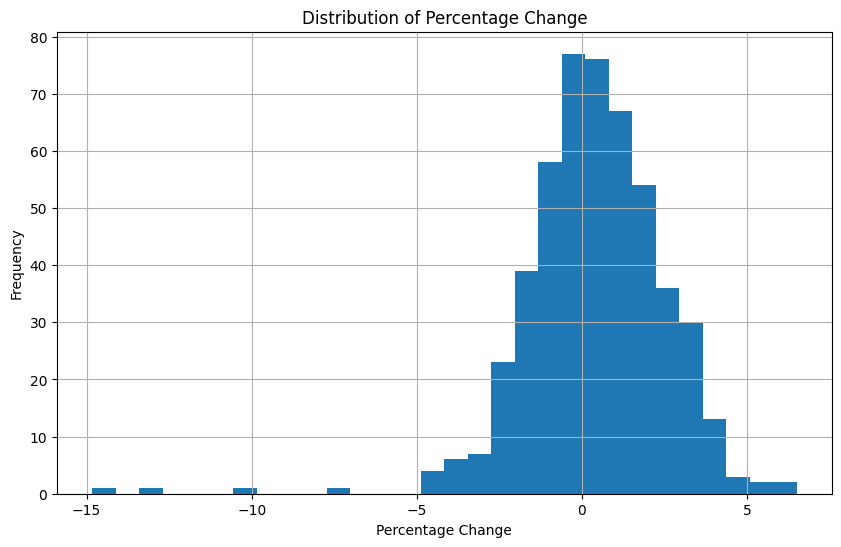

In [32]:
stocks_encoded['Percentage Change'].hist(bins=30, figsize=(10, 6))
plt.title('Distribution of Percentage Change')
plt.xlabel('Percentage Change')
plt.ylabel('Frequency')
plt.show()

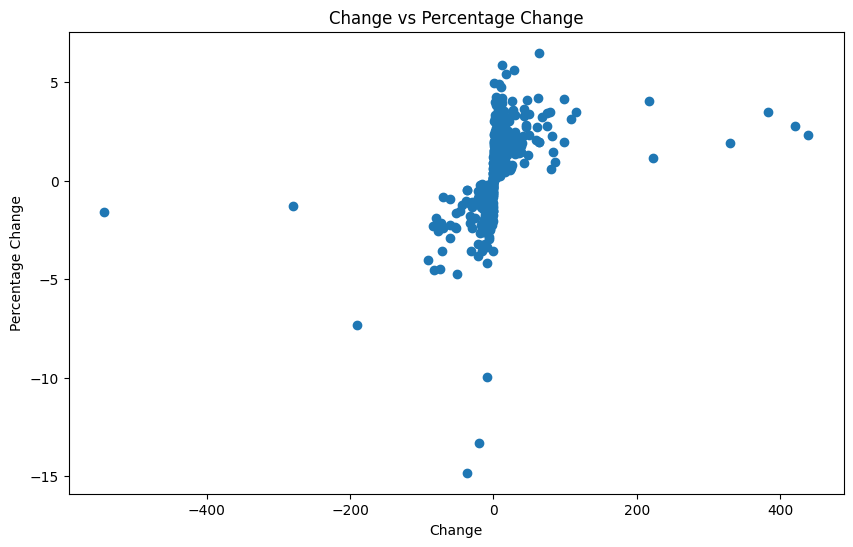

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(stocks_encoded['Change'], stocks_encoded['Percentage Change'])
plt.xlabel('Change')
plt.ylabel('Percentage Change')
plt.title('Change vs Percentage Change')
plt.show()

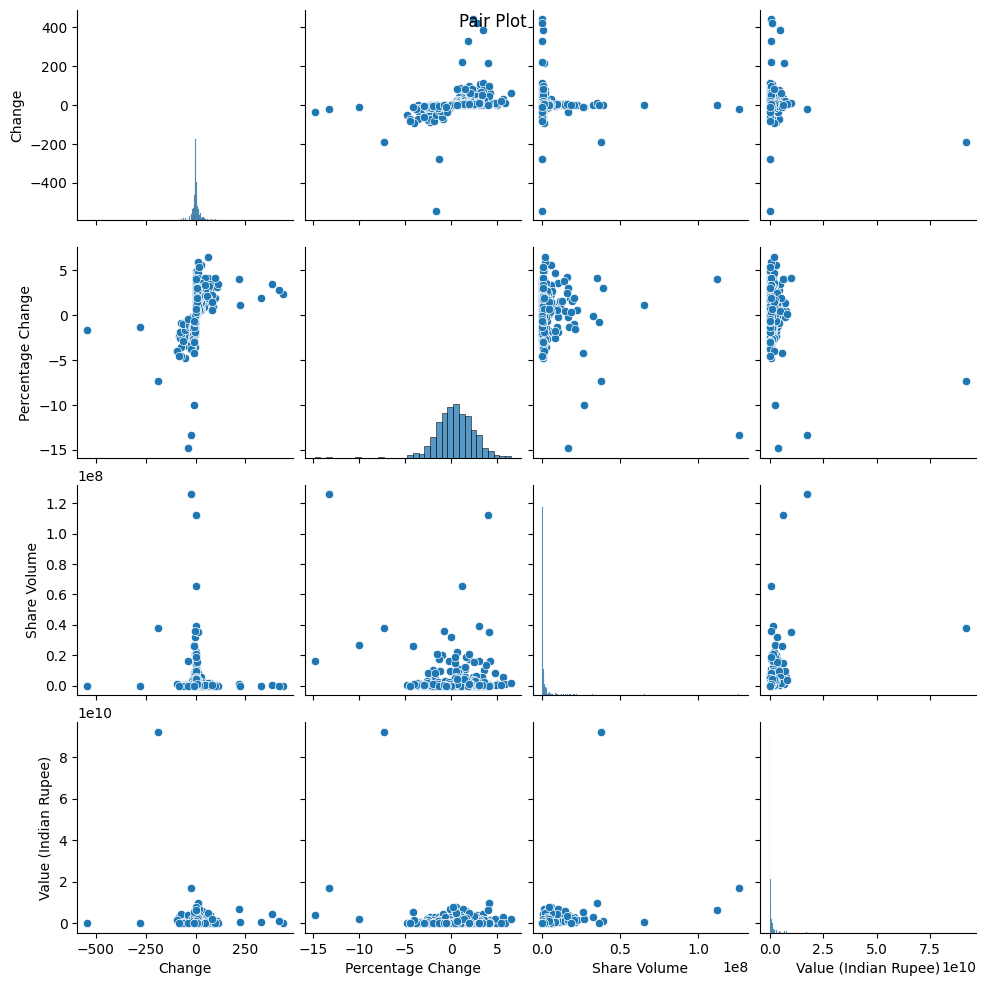

In [34]:
sns.pairplot(stocks_encoded[['Change', 'Percentage Change', 'Share Volume', 'Value (Indian Rupee)']])
plt.suptitle('Pair Plot')
plt.show()

## **Lnear Regression Model**

In [35]:
#Linear Regression Model
x=stocks_encoded[['Open', 'High', 'Low', 'Previous Close', 'Share Volume','Change','52 Week High','52 Week Low']]
y=stocks_encoded['Last Traded Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=89)
model=LinearRegression()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

rmse=np.sqrt(mean_squared_error(y_test, y_pred))
mae=mean_absolute_error(y_test, y_pred)
acc=model.score(x_test, y_test)*100
print("RMSE: ",rmse)
print("MAE:",mae)
print("Accuracy:" ,acc)

RMSE:  10.405478977503243
MAE: 4.81658113766944
Accuracy: 99.99585290555628


# **Logistic Regression Model**

In [36]:
#Encoding for Logistic Model
stocks_encoded['Percentage_Change_Binary'] = stocks_encoded['Percentage Change'].apply(lambda x: 1 if x > 0 else 0)

In [37]:
#SVM Model

x=stocks_encoded[['Open','High','Low','Previous Close','Share Volume','Change','52 Week High','52 Week Low']]
y=stocks_encoded['Percentage_Change_Binary']

scaler=RobustScaler()
x_scaled=scaler.fit_transform(x)

x_train ,x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.45,random_state=89)

param_grid={'C': [1, 5, 50, 100],'gamma': [0.025, 0.5, 1, 10],'kernel': ['rbf','linear']}
grid_search=GridSearchCV(SVC(), param_grid,cv=6,scoring='accuracy')
grid_search.fit(x_train, y_train)

best_svm_model=grid_search.best_estimator_
pred_svm=best_svm_model.predict(x_test)

accu = accuracy_score(y_test,pred_svm)*100
prec = precision_score(y_test,pred_svm)
recall = recall_score(y_test,pred_svm)
f1 = f1_score(y_test,pred_svm)

print("Accuracy:",acc)
print("Precision:",prec)
print("Recall:",recall)
print("F1-score:",f1)

Accuracy: 99.99585290555628
Precision: 0.9856115107913669
Recall: 0.9856115107913669
F1-score: 0.9856115107913669


In [38]:
#LSVM Model

x=stocks_encoded[['Open','High','Low','Previous Close','Share Volume','Change','52 Week High','52 Week Low']]
y=stocks_encoded['Percentage_Change_Binary']

scaler=RobustScaler()
x_scaled=scaler.fit_transform(x)

x_train, x_test, y_train, y_test=train_test_split(x_scaled,y,test_size=0.45,random_state=89)
lsvm_model=LinearSVC(dual='auto')
lsvm_model.fit(x_train, y_train)
pred_lsvm=lsvm_model.predict(x_test)

acc=accuracy_score(y_test, pred_lsvm)*100
prec=precision_score(y_test,pred_lsvm)
recall=recall_score(y_test,pred_lsvm)
f1=f1_score(y_test,pred_lsvm)

print("Accuracy:",acc)
print("Precision:",prec)
print("Recall:",recall)
print("F1-score:",f1)

Accuracy: 97.34513274336283
Precision: 0.9716312056737588
Recall: 0.9856115107913669
F1-score: 0.9785714285714285


# **Random Forest Model**

In [39]:
from sklearn.ensemble import RandomForestRegressor

x_regression = stocks_encoded[['Open', 'High', 'Low', 'Previous Close', 'Share Volume', 'Change',]]
y_regression = stocks_encoded['Last Traded Price']

x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x_regression, y_regression, test_size=0.2, random_state=42)
rf_regressor = RandomForestRegressor(n_estimators=65, random_state=42)
rf_regressor.fit(x_train_reg, y_train_reg)
y_pred_reg = rf_regressor.predict(x_test_reg)

rmse = mean_squared_error(y_test_reg, y_pred_reg, squared=False)
mae = mean_absolute_error(y_test_reg, y_pred_reg)

print("Random Forest Regression RMSE:",rmse)
print("Random Forest Regression MAE:",mae)

Random Forest Regression RMSE: 90.10612409033155
Random Forest Regression MAE: 34.971302361005414


In [40]:
from sklearn.ensemble import RandomForestClassifier

x_classification = stocks_encoded[['Open', 'High', 'Low', 'Previous Close', 'Share Volume', 'Change',]]
y_classification = stocks_encoded['Percentage_Change_Binary']

x_train_clf, x_test_clf, y_train_clf, y_test_clf = train_test_split(x_classification, y_classification, test_size=0.3, random_state=89)
rf_classifier = RandomForestClassifier(n_estimators=2, random_state=42)
rf_classifier.fit(x_train_clf, y_train_clf)
y_pred_clf = rf_classifier.predict(x_test_clf)

accuracy = accuracy_score(y_test_clf, y_pred_clf)*100
prec=precision_score(y_test_clf,y_pred_clf)
recall=recall_score(y_test_clf,y_pred_clf)
f1=f1_score(y_test_clf,y_pred_clf)

print("Accuracy:",acc)
print("Precision:",prec)
print("Recall:",recall)
print("F1-score:",f1)

Accuracy: 97.34513274336283
Precision: 1.0
Recall: 0.9887640449438202
F1-score: 0.9943502824858756


# **Comparing Results**

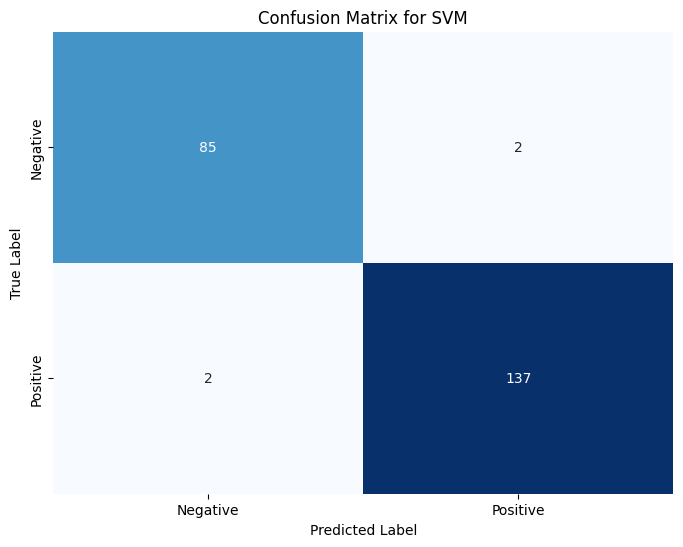

In [41]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

plot_confusion_matrix(confusion_matrix(y_test, pred_svm), 'Confusion Matrix for SVM')

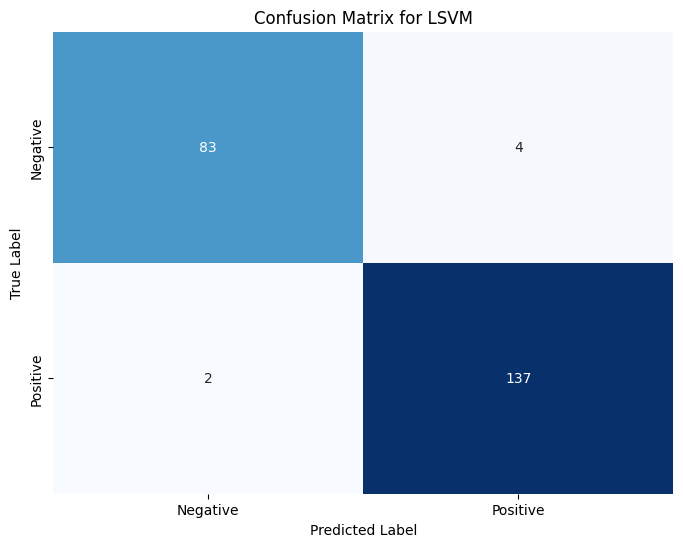

In [42]:
plot_confusion_matrix(confusion_matrix(y_test, pred_lsvm), 'Confusion Matrix for LSVM')

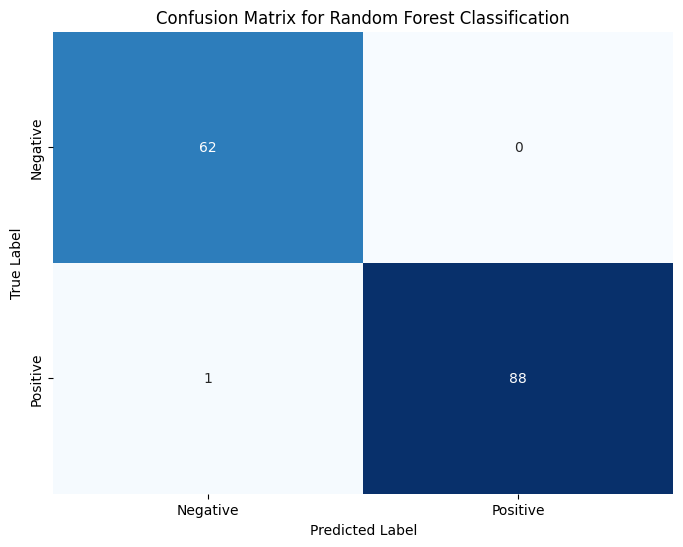

In [43]:
plot_confusion_matrix(confusion_matrix(y_test_clf, y_pred_clf), 'Confusion Matrix for Random Forest Classification')

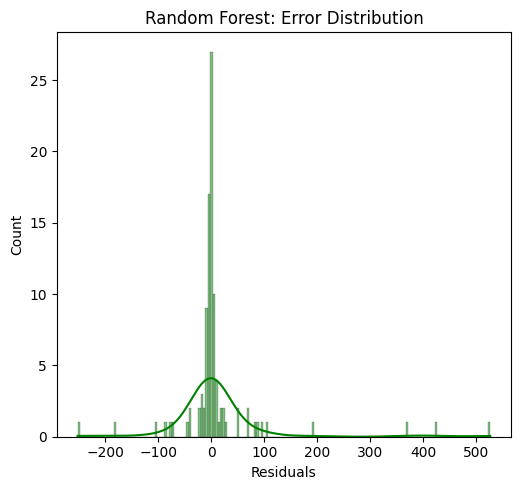

In [45]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
sns.histplot(y_test_reg - y_pred_reg, kde=True, color='green')
plt.title("Random Forest: Error Distribution")
plt.xlabel("Residuals")
plt.tight_layout()
plt.show()